# Đồ án môn Programming for Data Science

### Sinh viên
    1.18120210            Phạm Tống Bình Minh
    2.18120209            Phạm Nhật Minh

## Import LIB

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import calendar

## Display setting

In [2]:

pd.set_option('max_colwidth', None)
#pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
#pd.set_option('display.width', None)


## Data reading

In [3]:
df = pd.read_csv("data.csv")

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


## Exploration

In [5]:
df.shape

(7043, 21)

### Dữ liệu có các dòng bị lặp không?

In [6]:
df.duplicated().sum()

0

### Xem ý nghĩa của các cột

### Xem tỉ lệ dữ liệu bị thiếu

In [7]:
def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)

In [8]:
missing = df.agg(missing_ratio)
missing[missing > 0]

Series([], dtype: float64)

### Xem kiểu dữ liệu của các cột

In [9]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

#### chuyển cột "TotalCharges" từ object thành float64

In [10]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

#### check lại tỉ lệ bị thiếu

In [11]:
missing = df.agg(missing_ratio)
missing[missing > 0]

TotalCharges    0.2
dtype: float64

#### Nhận xét:

    + Vì dữ liệu bị thiếu không nhiều và dữ liệu còn lại khá lớn nên ta xóa các dòng bị khuyết

In [12]:
df.dropna(inplace= True)

## Preprocessing

### Với mỗi cột có kiểu dữ liệu có dạng số, các giá trị được phân bố như thế nào?

In [13]:
num_cols = df.select_dtypes(include = 'number').columns
num_cols

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

In [14]:

def missing_ratio(df):
    return (df.isna().mean() * 100).round(1)
def lower_quartile(df):
    return df.quantile(0.25).round(1)
def median(df):
    return df.quantile(0.5).round(1)
def upper_quartile(df):
    return df.quantile(0.75).round(1)

In [15]:
df[num_cols].agg([min,lower_quartile, median, upper_quartile,max])

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
min,0.0,1.0,18.25,18.8
lower_quartile,0.0,9.0,35.60,401.4
median,0.0,29.0,70.40,1397.5
upper_quartile,0.0,55.0,89.90,3794.7
max,1.0,72.0,118.75,8684.8


##### Nhận xét:
    + Các cột giá trị số không có gì khác thường

### Với mỗi cột có kiểu dữ liệu có dạng số, các giá trị được phân bố như thế nào?

In [16]:
object_cols = df.select_dtypes(exclude = ['number']).columns

In [17]:
def num_values(df):
    return df.nunique()
def value_ratios(c):
    return dict((c.value_counts(normalize=True) * 100)[0:5].round(3))
df[object_cols].agg([num_values, value_ratios])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
num_values,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
value_ratios,"{'4526-ZJJTM': 0.014, '9092-GDZKO': 0.014, '5519-YLDGW': 0.014, '1545-ACTAS': 0.014, '4359-INNWN': 0.014}","{'Male': 50.469, 'Female': 49.531}","{'No': 51.749, 'Yes': 48.251}","{'No': 70.151, 'Yes': 29.849}","{'Yes': 90.33, 'No': 9.67}","{'No': 48.137, 'Yes': 42.193, 'No phone service': 9.67}","{'Fiber optic': 44.027, 'DSL': 34.357, 'No': 21.615}","{'No': 49.73, 'Yes': 28.655, 'No internet service': 21.615}","{'No': 43.899, 'Yes': 34.485, 'No internet service': 21.615}","{'No': 43.999, 'Yes': 34.386, 'No internet service': 21.615}","{'No': 49.374, 'Yes': 29.01, 'No internet service': 21.615}","{'No': 39.946, 'Yes': 38.439, 'No internet service': 21.615}","{'No': 39.548, 'Yes': 38.837, 'No internet service': 21.615}","{'Month-to-month': 55.105, 'Two year': 23.962, 'One year': 20.933}","{'Yes': 59.272, 'No': 40.728}","{'Electronic check': 33.632, 'Mailed check': 22.81, 'Bank transfer (automatic)': 21.928, 'Credit card (automatic)': 21.63}","{'No': 73.422, 'Yes': 26.578}"


##### Nhận xét:
    + Các cột giá trị không phải số không có gì khác thường

## Phân tích các Insights

### Insight 1 : Tác động làm tăng tỉ lệ Churn

### Insight 2: Tác động làm giảm tỉ lệ Churn

**Lấy data với churn = 'no'**

In [18]:
churn_no_df = df[df["Churn"] =='No']

### Tenure

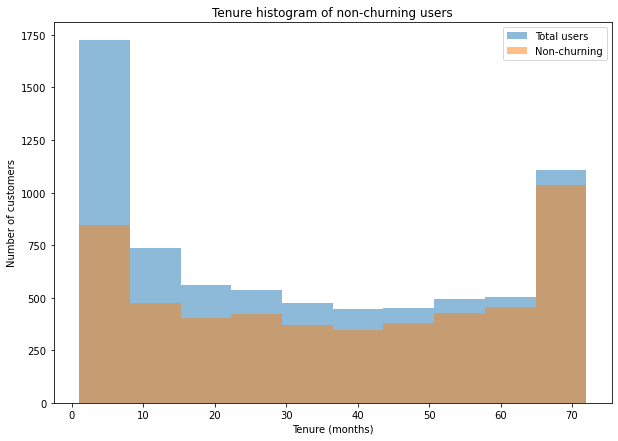

In [19]:
plt.figure(figsize=(10,7))
plt.hist(df['tenure'], alpha=0.5, label='Total users')
plt.hist(churn_no_df['tenure'], alpha=0.5, label='Non-churning')
plt.legend(loc='upper right')
plt.title('Tenure histogram of non-churning users')
plt.xlabel('Tenure (months)')
plt.ylabel('Number of customers');

#### Nhận xét:
    + Những người có tenure cao hơn 10 tháng sẽ ít churn nhất
#### Possible explanation:
    + Khách hàng nếu dùng thời gian dài là khách hàng hài lòng với dịch vụ -> ít khả năng churn
#### Suggestions:
    + Ưu đãi khách hàng sử dụng lâu (đăng kí 1 năm tặng 6 tháng chẳng hạn)

### Senior citizens

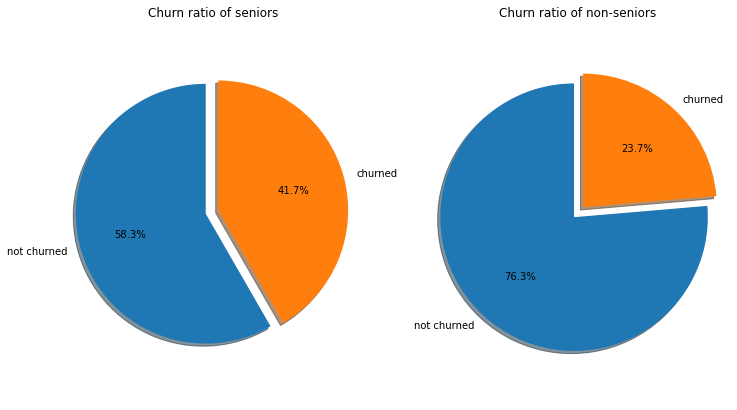

In [20]:
p_no_churn = churn_no_df['SeniorCitizen'].value_counts() 
p = df['SeniorCitizen'].value_counts()
labels = 'not churned', 'churned'

sizes_senior = [p_no_churn[1]/p[1],1-(p_no_churn[1]/p[1])]
sizes_not_senior = [p_no_churn[0]/p[0],1-(p_no_churn[0]/p[0])]
explode = (0.1, 0)

fig, (ax1, ax2) = plt.subplots(1,2)
ax1.pie(sizes_senior, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')
ax1.set_title('Churn ratio of seniors')

ax2.pie(sizes_not_senior, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax2.axis('equal')
ax2.set_title('Churn ratio of non-seniors')

fig.set_figheight(7)
fig.set_figwidth(12)
plt.show()

#### Nhận xét:
    + Không phải là senior citizen sẽ ít churn hơn
#### Possible explanation:
    + Cắt giảm chi phí không cần thiết khi không còn thu nhập
#### Suggestions:
    + Ưu đãi giảm giá cho khách hàng lớn tuổi

### Cost (monthly charges)

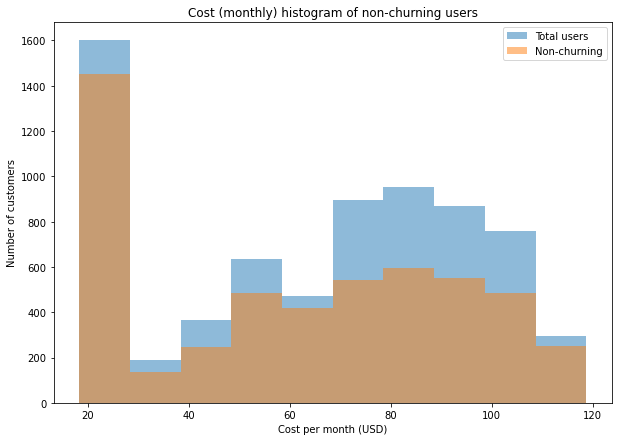

In [21]:
plt.figure(figsize=(10,7))
plt.hist(df['MonthlyCharges'], alpha=0.5, label='Total users')
plt.hist(churn_no_df['MonthlyCharges'], alpha=0.5, label='Non-churning')
plt.legend(loc='upper right')
plt.title('Cost (monthly) histogram of non-churning users')
plt.xlabel('Cost per month (USD)')
plt.ylabel('Number of customers');

#### Nhận xét:
    + Hóa đơn mỗi tháng càng thấp thì càng ít churn
    + Khoảng hóa đơn cao nhất lại ít churn hơn khoảng ở giữa
#### Possible explanation:
    + Các khách hàng có hóa đơn lớn nhất giàu hơn nên không cần cắt dịch vụ để tiết kiệm tiền
    + Các khách hàng có hóa đơn bé nhất hài lòng với dịch vụ do chỉ xài ít dịch vụ => chỉ xài những dịch vụ cần thiết

### Subscribed products

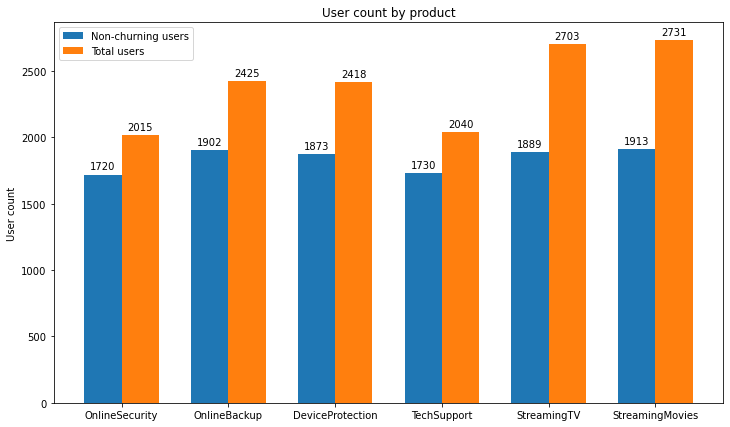

In [22]:
products=['OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
product_churn_no_p=[len(churn_no_df[churn_no_df[k] =='Yes'])  for k in products] 
product_total_p=[len(df[df[k] =='Yes']) for k in products]

x = np.arange(len(products))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, product_churn_no_p, width, label='Non-churning users')
rects2 = ax.bar(x + width/2, product_total_p, width, label='Total users')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('User count')
ax.set_title('User count by product')
ax.set_xticks(x)
ax.set_xticklabels(products)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.set_figheight(7)
fig.set_figwidth(12)

plt.show()

#### Nhận xét:
    + Sản phẩm streaming churn nhiều hơn các dịch vụ khác
#### Possible explanation:
    + Sản phẩm chèn quảng cáo làm người dùng bực
    + Sản phẩm không cạnh tranh được về số lượng hoặc chất lượng với các dịch vụ streaming khác (không có các exclusive người dùng muốn xem chẳng hạn)
#### Suggestions:
    + Cải thiện chất lượng sản phẩm streaming

### Services

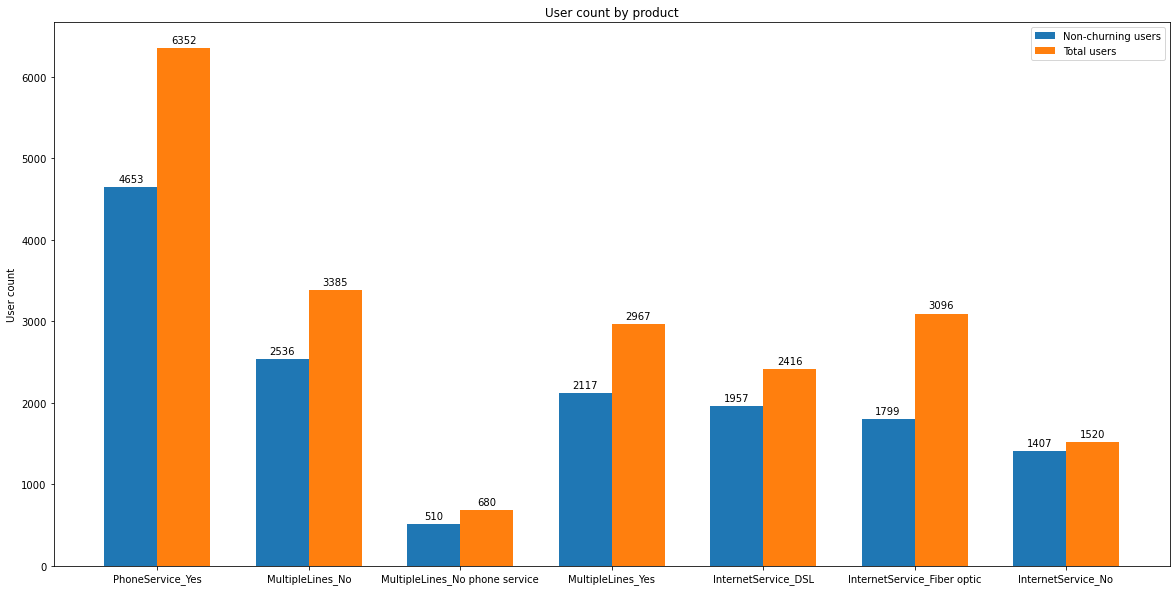

In [23]:
services=[ ('PhoneService','Yes'),('MultipleLines','No'),('MultipleLines','No phone service'),('MultipleLines','Yes'), ('InternetService','DSL'),('InternetService','Fiber optic'), ('InternetService','No')]
services_churn_no_p=[len(churn_no_df[churn_no_df[k[0]] == k[1]]) for k in services] 
services_total_p=[len(df[df[k[0]] == k[1]]) for k in services]
services_labels = (k[0]+'_'+k[1] for k in services)

x = np.arange(len(services))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, services_churn_no_p, width, label='Non-churning users')
rects2 = ax.bar(x + width/2, services_total_p, width, label='Total users')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('User count')
ax.set_title('User count by product')
ax.set_xticks(x)
ax.set_xticklabels(services_labels)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.set_figheight(10)
fig.set_figwidth(20)

plt.show()

#### Nhận xét:
    + Internet cáp quang churn nhiều hơn các dịch vụ khác
#### Possible explanation:
    + Internet cáp quang chất lượng kém
#### Suggestions:
    + Cải thiện chất lượng internet cáp quang

**Loại hình thanh toán**

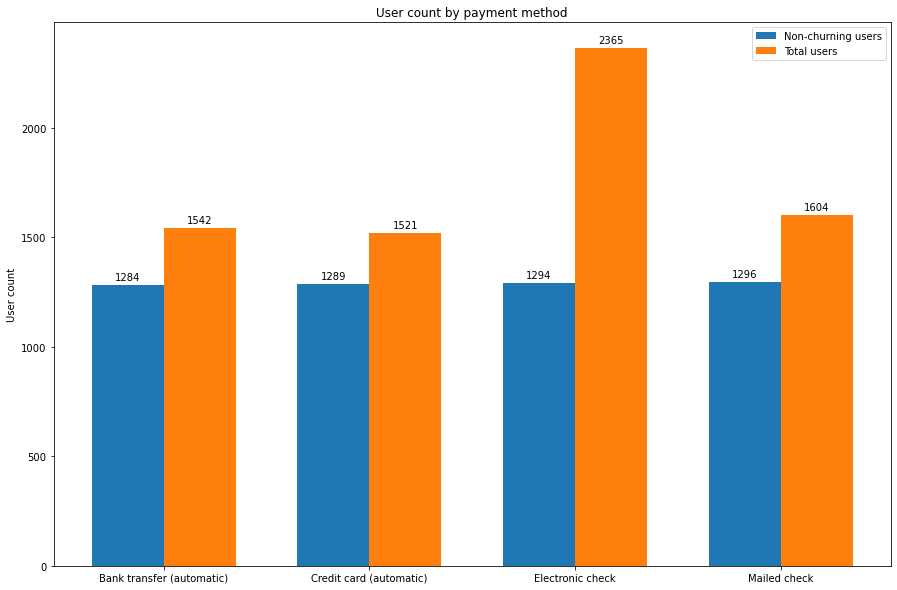

In [24]:
finance=['Bank transfer (automatic)','Credit card (automatic)','Electronic check','Mailed check']
finance_churn_no_p=[len(churn_no_df[churn_no_df['PaymentMethod'] == k]) for k in finance] 
finance_total_p=[len(df[df['PaymentMethod'] == k]) for k in finance]

x = np.arange(len(finance))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, finance_churn_no_p, width, label='Non-churning users')
rects2 = ax.bar(x + width/2, finance_total_p, width, label='Total users')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('User count')
ax.set_title('User count by payment method')
ax.set_xticks(x)
ax.set_xticklabels(finance)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.set_figheight(10)
fig.set_figwidth(15)

plt.show()

#### Nhận xét:
    + Thanh toán bằng Electronic check churn nhiều hơn dịch vụ khác
#### Possible explanation:
    + Người dùng dùng thử nên không đăng kí thanh toán tự động

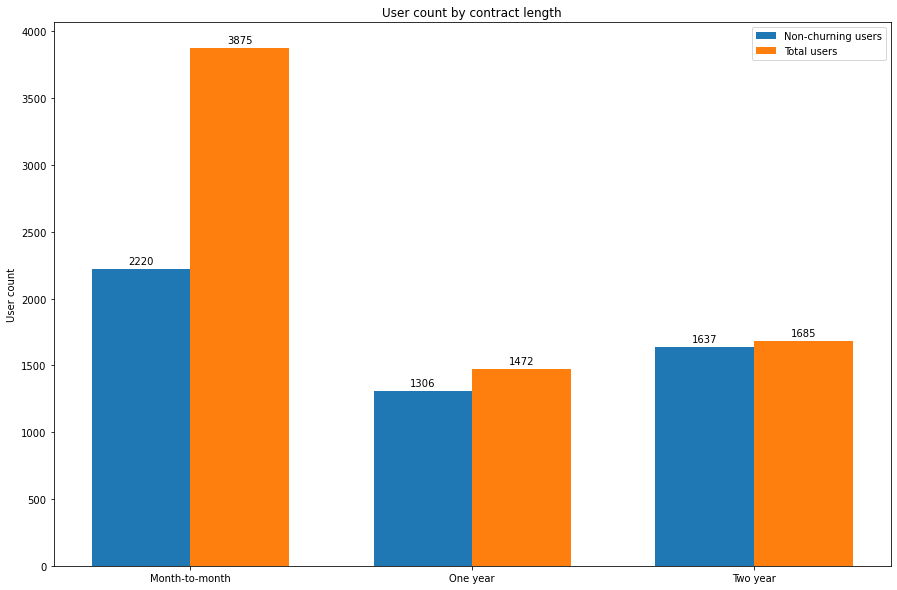

In [25]:
finance=['Month-to-month','One year','Two year']
finance_churn_no_p=[len(churn_no_df[churn_no_df['Contract'] == k]) for k in finance] 
finance_total_p=[len(df[df['Contract'] == k]) for k in finance]

x = np.arange(len(finance))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, finance_churn_no_p, width, label='Non-churning users')
rects2 = ax.bar(x + width/2, finance_total_p, width, label='Total users')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('User count')
ax.set_title('User count by contract length')
ax.set_xticks(x)
ax.set_xticklabels(finance)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

fig.set_figheight(10)
fig.set_figwidth(15)

plt.show()

#### Nhận xét:
    + Hợp đồng ngắn hạn churn nhiều hơn
#### Possible explanation:
    + Người dùng dùng thử hoặc không có nhu cầu sử dụng lâu